Задачу, которая стоит перед вами, можно свести к пяти пунктам:

**Удаление строковых значений.** Вам необходимо удалить из набора данных столбцы, данные в которых представлены не числами.

**Очистка от пропущенных значений.** На предыдущем шаге мы делали это самым грубым из всех возможных способов, сейчас попробуйте подойти к процессу более гибко.

**Создание новых признаков.** Мы попробуем создать новые столбцы с данными из существующих данных или с использованием внешних источников.

**Преобразование признаков.** Применим различные преобразования над признаками вроде нормализации, стандартизации.

**Отбор признаков.** Используем анализ мультиколлинеарности как шаг отбора признаков для модели.

In [52]:
# Добавить графики

# Добавить гипотезы и работу с ними
# Проверка мультиколлинеарности
# Отбор признаков
#
#
#



In [54]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import seaborn as sns # импортируем seaborn для построения графиков
import category_encoders as ce

In [2]:
hotels = pd.read_csv('hotels.csv')

In [3]:
hotels_df = hotels.copy()
hotels_df.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [4]:
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

**00 hotel_address** — адрес отеля {нечисловой};

**01 additional_number_of_scoring** — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки {числовой};

**02 review_date** — дата, когда рецензент разместил соответствующий отзыв {дата};

**03 average_score** — средний балл отеля, рассчитанный на основе последнего комментария за последний год {числовой};

**04 hotel_name** — название отеля {нечисловой};

**05 reviewer_nationality** — страна рецензента {нечисловой};

**06 negative_review** — отрицательный отзыв, который рецензент дал отелю {нечисловой};

**07 review_total_negative_word_counts** — общее количество слов в отрицательном отзыве {числовой};

**08 total_number_of_reviews** — общее количество действительных отзывов об отеле {числовой};

**09 positive_review** — положительный отзыв, который рецензент дал отелю {нечисловой};

**10 review_total_positive_word_counts** — общее количество слов в положительном отзыве {числовой};

**11 total_number_of_reviews_reviewer_has_given** — количество отзывов, которые рецензенты дали в прошлом {числовой};

**12 reviewer_score** — оценка, которую рецензент поставил отелю на основе своего опыта {числовой};

**13 tags** — теги, которые рецензент дал отелю {нечисловой};

**14 days_since_review** — количество дней между датой проверки и датой очистки {нечисловой};

**15 lat** — географическая широта отеля {числовой};

**16 lng** — географическая долгота отеля {числовой}.

In [5]:
#Выделим числовые и нечисловые признаки

non_numeric_features = [
    'hotel_address',
    'hotel_name',
    'reviewer_nationality',
    'negative_review',
    'positive_review',
    'tags',
    'days_since_review'
    ]

numeric_features = [
    'additional_number_of_scoring',
    'average_score',
    'review_total_negative_word_counts',
    'total_number_of_reviews',
    'review_total_positive_word_counts',
    'total_number_of_reviews_reviewer_has_given',
    'reviewer_score',
    'lat',
    'lng'
    ]

In [6]:
#Посмотрим на содержание признаков
hotels_df.head(1)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671


**!!!Прианализируем времяной признак**

In [7]:
#Выясним, сколько дат и в каком промежутке присутствуют в данных
print(f"Число дней в данных: {hotels_df['review_date'].nunique()}")

#Преобразуем данные к типу datetime
hotels_df['review_date'] = pd.to_datetime(hotels_df['review_date'])

#Выясним, сколько теперь дат и в каком промежутке присутствуют в данных
print(f"Число дней в данных после преобразования в datetime: {hotels_df['review_date'].nunique()}")

print(f"В данных приведен времяной провежуток с {hotels_df['review_date'].dt.date.min()} по {hotels_df['review_date'].dt.date.max()}")

Число дней в данных: 731
Число дней в данных после преобразования в datetime: 731
В данных приведен времяной провежуток с 2015-08-04 по 2017-08-03


In [8]:
#Найдем, когда были оставлены самый первый и последний отзывы
print(f"Дата самого раннего отзыва: {hotels_df['review_date'].dt.date.min()}")
print(f"Дата самого последнего отзыва: {hotels_df['review_date'].dt.date.max()}")

Дата самого раннего отзыва: 2015-08-04
Дата самого последнего отзыва: 2017-08-03


In [9]:
#Выделим из признака 'review_date' номер недели
hotels_df['week'] = hotels_df['review_date'].dt.isocalendar().week
hotels_df['week'] = hotels_df['week'].astype('int64')

In [10]:
#Выделим из признака 'review_date' время года
#hotels_df['review_date'].dt.month 
# 1,2,12 - winter (зима)
# 3,4,5 - spring (весна)
# 6,7,8 - summer (лето)
# 9,10,11 - autumn (осень)

hotels_df['is_winter'] = hotels_df['review_date'].dt.month.apply(lambda x: 1 if x in [1,2,12] else 0)
hotels_df['is_spring'] = hotels_df['review_date'].dt.month.apply(lambda x: 1 if x in [3,4,5] else 0)
hotels_df['is_summer'] = hotels_df['review_date'].dt.month.apply(lambda x: 1 if x in [6,7,8] else 0)
hotels_df['is_autumn'] = hotels_df['review_date'].dt.month.apply(lambda x: 1 if x in [9,10,11] else 0)

#Проверим результат
hotels_df[['review_date','week','is_winter','is_spring','is_summer','is_autumn']]

#Удалим признак 'review_date'
hotels_df = hotels_df.drop(['review_date'], axis=1)

**!!!Проанализируем не числовые признаки**

'hotel_address',

'hotel_name',

'reviewer_nationality',
    
'negative_review',
    
'positive_review',
    
'tags',
    
'days_since_review'.

После преобразования их в числовые, будем удалять

In [11]:
#Найдем число учавствующих отелей и их адресов (должны совпадать)
print('Число адресов отелей: ', hotels_df['hotel_address'].nunique())
print('Число названий отелей: ', hotels_df['hotel_name'].nunique())

Число адресов отелей:  1493
Число названий отелей:  1492


*Из полученного результата делаем вывод, что либо какой-то один отель занимает 2 адресса, либо есть опечатка в адресе в какой-то строке.*

In [12]:
#Рассмотрим страны резидентов
print('Число стран: ', hotels_df['reviewer_nationality'].nunique())

Число стран:  225


In [13]:
#Закодируем адреса и страны в числовой вид, чтобы модель могла учитывать эти признаки

ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(hotels_df[['hotel_address', 'reviewer_nationality']])
data_bin.rename(columns={'hotel_address': 'hotel_address_n', 'reviewer_nationality': 'reviewer_nationality_n'}, inplace=True)
hotels_df = pd.concat([hotels_df, data_bin], axis=1)

#Удалим признаки 'hotel_address', 'hotel_name', 'reviewer_nationality'
hotels_df = hotels_df.drop(['hotel_address','hotel_name','reviewer_nationality'], axis=1)

hotels_df.head(1)


,additional_number_of_scoring,average_score,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,week,is_winter,is_spring,is_summer,is_autumn,hotel_address_n,reviewer_nationality_n
0,581,8.4,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,7,1,0,0,0,1,1


In [15]:
#Рассмотрим количество негативных отзывов
print(f"Число негативных отзывов: {hotels_df['negative_review'].nunique()}")
hotels_df['negative_review'].value_counts().head(10)

Число негативных отзывов: 248828


No Negative    95907
 Nothing       10737
 Nothing        3154
 nothing        1660
 N A             802
 None            737
                 606
 N a             384
 Breakfast       296
 Small room      283
Name: negative_review, dtype: int64

In [16]:
#Закодируем негативные отзывы

bin_encoder = ce.BinaryEncoder(cols=['negative_review'])
type_bin = bin_encoder.fit_transform(hotels_df['negative_review'])
hotels_df = pd.concat([hotels_df, type_bin], axis=1)

#Удалим признак 'negative_review'
hotels_df = hotels_df.drop(['negative_review'], axis=1)

hotels_df.head(1)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,...,negative_review_8,negative_review_9,negative_review_10,negative_review_11,negative_review_12,negative_review_13,negative_review_14,negative_review_15,negative_review_16,negative_review_17
0,581,8.4,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,...,0,0,0,0,0,0,0,0,0,1


In [17]:
#Рассмотрим количество позитивных отзывов
print(f"Число негативных отзывов: {hotels_df['positive_review'].nunique()}")
hotels_df['positive_review'].value_counts().head(10)

Число негативных отзывов: 311737


No Positive        26885
 Location           6833
 Everything         1697
 location           1251
 Nothing             931
 The location        830
 Great location      809
 Good location       690
 Location            663
 Breakfast           455
Name: positive_review, dtype: int64

In [ ]:
#Подготовим данные признаков для преобразования

#positive_review = ['No Positive', ' Location', ' Everything', ' location', ' Nothing', ' The location', ' Great location',
#                   ' Good location', ' Location', ' Breakfast', ' Everything',' Friendly staff',' Staff',' Excellent location',
#                   ' Great location', ' Location and staff', ' everything', ' Good location', ' Nothing', ' nothing']
#hotels_df['positive_review'] = hotels_df['positive_review'].apply(lambda x: x if x in positive_review else 'other')
#hotels_df['positive_review'].value_counts()

In [18]:
#Закодируем позитивные отзывы

bin_encoder = ce.BinaryEncoder(cols=['positive_review']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels_df['positive_review'])
hotels_df = pd.concat([hotels_df, type_bin], axis=1)

#Удалим признак 'positive_review'
hotels_df = hotels_df.drop(['positive_review'], axis=1)

hotels_df.head(3)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,...,positive_review_9,positive_review_10,positive_review_11,positive_review_12,positive_review_13,positive_review_14,positive_review_15,positive_review_16,positive_review_17,positive_review_18
0,581,8.4,3,1994,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,...,0,0,0,0,0,0,0,0,0,1
1,299,8.3,3,1361,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,...,0,0,0,0,0,0,0,0,1,0
2,32,8.9,6,406,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,...,0,0,0,0,0,0,0,0,1,1


In [19]:
#Проанализируем теги
hotels_df['tags'].value_counts().head(3)

[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']             3853
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']    3673
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']    3274
Name: tags, dtype: int64

In [20]:
def re_func(num_tags):
    found = re.findall("'[^\'](.+?)[^\']'", num_tags)
    return found


hotels_df['tags_n'] = hotels_df['tags'].apply(re_func)
hotels_df = hotels_df.explode('tags_n')

#Удалим признак 'tags'
hotels_df = hotels_df.drop(['tags'], axis=1)

print(f"Число тегов равно: {hotels_df['tags_n'].nunique()}")

Число тегов равно: 2368


In [21]:
hotels_df['tags_n'].value_counts().head(5)

Leisure trip                      313593
Submitted from a mobile device    230778
Couple                            189212
Stayed 1 night                    145373
Stayed 2 nights                   100263
Name: tags_n, dtype: int64

Закодируем тэги

In [22]:
bin_encoder = ce.BinaryEncoder(cols=['tags_n']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels_df['tags_n'])
hotels_df = pd.concat([hotels_df, type_bin], axis=1)

#Удалим признак 'tags_n'
hotels_df = hotels_df.drop(['tags_n'], axis=1)

hotels_df.head(3)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,...,tags_n_2,tags_n_3,tags_n_4,tags_n_5,tags_n_6,tags_n_7,tags_n_8,tags_n_9,tags_n_10,tags_n_11
0,581,8.4,3,1994,4,7,10.0,531 day,51.507894,-0.143671,...,0,0,0,0,0,0,0,0,0,1
0,581,8.4,3,1994,4,7,10.0,531 day,51.507894,-0.143671,...,0,0,0,0,0,0,0,0,1,0
0,581,8.4,3,1994,4,7,10.0,531 day,51.507894,-0.143671,...,0,0,0,0,0,0,0,0,1,1


In [23]:
#Рассмотрим количество дней между датой проверки и датой очистки
hotels_df['days_since_review'].value_counts()

1 days     8809
322 day    8095
120 day    7793
338 day    6776
534 day    6711
           ... 
121 day     681
615 day     651
122 day     651
124 day     558
123 day     481
Name: days_since_review, Length: 731, dtype: int64

In [24]:
#Преобразуем признак 'days_since_review' в числовой вид
def to_integer(x):
    a = x.split()
    return np.int64(a[0])

hotels_df['days_since_review'] = hotels_df['days_since_review'].apply(to_integer)
hotels_df['days_since_review']

0         531
0         531
0         531
0         531
0         531
         ... 
386801     74
386802    363
386802    363
386802    363
386802    363
Name: days_since_review, Length: 1767522, dtype: int64

**!!!Проанализируем числовые признаки**

In [25]:
#Для начала избавимся от пропусков. Найдем пропуски в данных
NaN_df = hotels_df.isnull().sum()
display(NaN_df[NaN_df > 0])

lat    11017
lng    11017
dtype: int64

In [31]:
#Найдём процент пропусков относительно общего числа
print("Процент пропущенных значений:'", round((11017/hotels.shape[0])*100,2),'%')

Процент пропущенных значений:' 2.85 %


Присутствуют пропуски в признаках "географическая широта и долгота отеля". Можно заполнить пропуски медианными или средними значениями, но так как это координаты, их не разумно заполнять чем-то средним.

В таком случае, лучше пожертвовать 2,85 процентами данных, чем вносить неизмеримую погрешность.

Самым точным же путем будет поиск во внешних источниках названий и координат отелей, но, так как их 11017 шт., то производить это действие, ради малой доли данных не рационально.

Вывод: Нужно удалить строки, в которых содержатся пропуски.

In [32]:
hotels_df.dropna(how='any', axis=0, inplace=True);

In [33]:
#Проверим, удалились ли строки с пропусками
NaN_df = hotels_df.isnull().sum()
display(NaN_df[NaN_df > 0])

Series([], dtype: int64)

Как мы видим, строки с пропусками удалились

In [34]:
#Получим описательную статистику по числовым признакам
hotels_df[numeric_features].describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
count,1.756505e+06,1.756505e+06,1.756505e+06,1.756505e+06,1.756505e+06,1.756505e+06,1.756505e+06,1.756505e+06,1.756505e+06
mean,5.023287e+02,8.398813e+00,1.827610e+01,2.751480e+03,1.753048e+01,7.017133e+00,8.401915e+00,4.944983e+01,2.797368e+00
std,5.021892e+02,5.488646e-01,2.934022e+01,2.321959e+03,2.140729e+01,1.084631e+01,1.638640e+00,3.469038e+00,4.550756e+00
min,1.000000e+00,5.200000e+00,0.000000e+00,4.300000e+01,0.000000e+00,1.000000e+00,2.500000e+00,4.132838e+01,-3.697581e-01
25%,1.700000e+02,8.100000e+00,2.000000e+00,1.161000e+03,5.000000e+00,1.000000e+00,7.500000e+00,4.821466e+01,-1.436492e-01
50%,3.470000e+02,8.400000e+00,9.000000e+00,2.135000e+03,1.100000e+01,3.000000e+00,8.800000e+00,5.150073e+01,-2.497000e-04
75%,6.810000e+02,8.800000e+00,2.300000e+01,3.633000e+03,2.200000e+01,8.000000e+00,9.600000e+00,5.151638e+01,4.831098e+00
max,2.682000e+03,9.800000e+00,4.080000e+02,1.667000e+04,3.950000e+02,3.550000e+02,1.000000e+01,5.240018e+01,1.642923e+01


In [35]:
#Найдем число уникальных значений в числовых признаках
hotels_df[numeric_features].nunique()

additional_number_of_scoring                   479
average_score                                   34
review_total_negative_word_counts              402
total_number_of_reviews                       1132
review_total_positive_word_counts              353
total_number_of_reviews_reviewer_has_given     193
reviewer_score                                  37
lat                                           1472
lng                                           1472
dtype: int64

## !!!Преобразование признаков (стандартизация/нормализация).

In [37]:
#Посмотрим на структуру данных
hotels_df[numeric_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1756505 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   additional_number_of_scoring                int64  
 1   average_score                               float64
 2   review_total_negative_word_counts           int64  
 3   total_number_of_reviews                     int64  
 4   review_total_positive_word_counts           int64  
 5   total_number_of_reviews_reviewer_has_given  int64  
 6   reviewer_score                              float64
 7   lat                                         float64
 8   lng                                         float64
dtypes: float64(4), int64(5)
memory usage: 134.0 MB


In [39]:
#Выдвигаем гипотезы относительно нормального распределения данных
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

#Установим уровень значимости в 5%
alpha = 0.05

In [43]:
#Тест Шапиро-Уилка
from scipy.stats import shapiro

_, p = shapiro(hotels_df['additional_number_of_scoring'])
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.000
Данные не распределены нормально (мы отвергаем H0)


In [50]:
#Тест Д’Агостино
from scipy.stats import normaltest

_, p = normaltest(hotels_df['additional_number_of_scoring'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

IndexError: invalid index to scalar variable.

In [22]:
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767522 entries, 0 to 386802
Data columns (total 27 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   hotel_address                               object 
 1   additional_number_of_scoring                int64  
 2   average_score                               float64
 3   hotel_name                                  object 
 4   reviewer_nationality                        object 
 5   review_total_negative_word_counts           int64  
 6   total_number_of_reviews                     int64  
 7   review_total_positive_word_counts           int64  
 8   total_number_of_reviews_reviewer_has_given  int64  
 9   reviewer_score                              float64
 10  days_since_review                           int64  
 11  lat                                         float64
 12  lng                                         float64
 13  week                        

## !!!Отбор признаков (анализ мультиколлинеарности).

In [57]:
hotels_df[numeric_features].corr()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
additional_number_of_scoring,1.000000,-0.153824,0.029427,0.826068,-0.051572,-0.072681,-0.061649,0.336551,-0.295954
average_score,-0.153824,1.000000,-0.113737,-0.181456,0.106098,0.036982,0.364493,-0.108099,0.105756
review_total_negative_word_counts,0.029427,-0.113737,1.000000,0.035277,0.116821,0.001534,-0.382924,0.019536,-0.020945
total_number_of_reviews,0.826068,-0.181456,0.035277,1.000000,-0.028978,-0.026888,-0.073627,0.101432,-0.015160
review_total_positive_word_counts,-0.051572,0.106098,0.116821,-0.028978,1.000000,0.026060,0.219568,-0.038657,0.034636
total_number_of_reviews_reviewer_has_given,-0.072681,0.036982,0.001534,-0.026888,0.026060,1.000000,0.002285,-0.060535,0.109952
reviewer_score,-0.061649,0.364493,-0.382924,-0.073627,0.219568,0.002285,1.000000,-0.036457,0.033695
lat,0.336551,-0.108099,0.019536,0.101432,-0.038657,-0.060535,-0.036457,1.000000,-0.304004
lng,-0.295954,0.105756,-0.020945,-0.015160,0.034636,0.109952,0.033695,-0.304004,1.000000


<AxesSubplot:>

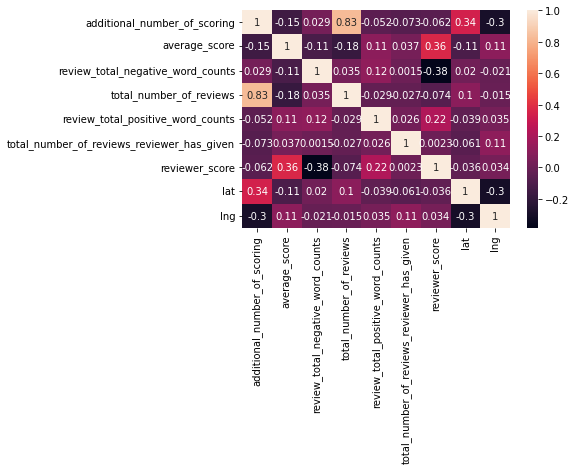

In [58]:
sns.heatmap(hotels_df[numeric_features].corr(), annot=True) # включаем отображение коэффициентов

In [51]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels_df.copy()
y = hotels_df['reviewer_score'] 

MemoryError: Unable to allocate 804. MiB for an array with shape (60, 1756505) and data type int64

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767522 entries, 0 to 386802
Data columns (total 22 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   additional_number_of_scoring                int64  
 1   average_score                               float64
 2   review_total_negative_word_counts           int64  
 3   total_number_of_reviews                     int64  
 4   review_total_positive_word_counts           int64  
 5   total_number_of_reviews_reviewer_has_given  int64  
 6   days_since_review                           int64  
 7   lat                                         float64
 8   lng                                         float64
 9   week                                        int64  
 10  is_winter                                   int64  
 11  is_spring                                   int64  
 12  is_summer                                   int64  
 13  is_autumn                   

In [27]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [28]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  

In [30]:
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100) 

In [31]:
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train) 

RandomForestRegressor()

In [32]:
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test) 

In [33]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.01439710441689621


Небольшой бонус:


In [ ]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)